In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [111]:
df = pd.read_excel('base_de_datos_vel.xlsx')


In [112]:
df.head(20)

,Level_number,DEPTH,DELTA_DEPTH,DELTA_TIME,ACOUSTIC_INTERVAL_VEL,AVERAGE_VEL
0,1.0,0.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,7870.0,NaN
2,2.0,414.3,NaN,NaN,NaN,7870.0
3,NaN,NaN,15.7,0.0023,6913.0,NaN
4,3.0,430.0,NaN,NaN,NaN,7830.0
5,NaN,NaN,15.7,0.0025,6345.0,NaN
6,4.0,445.7,NaN,NaN,NaN,7766.0
7,NaN,NaN,15.7,0.0026,6014.0,NaN
8,5.0,461.4,NaN,NaN,NaN,7690.0
9,NaN,NaN,15.7,0.0027,5835.0,NaN


In [114]:
df_cleaned = df

# iNTERPOLACIÓN DE VALORES DE PROFUNDIDAD

In [115]:
df_cleaned['DEPTH'] = df_cleaned['DEPTH'].interpolate()

In [116]:
df_cleaned

,Level_number,DEPTH,DELTA_DEPTH,DELTA_TIME,ACOUSTIC_INTERVAL_VEL,AVERAGE_VEL
0,1.0,0.00,NaN,NaN,NaN,NaN
1,NaN,207.15,NaN,NaN,7870.0,NaN
2,2.0,414.30,NaN,NaN,NaN,7870.0
3,NaN,422.15,15.7,0.0023,6913.0,NaN
4,3.0,430.00,NaN,NaN,NaN,7830.0
...,...,...,...,...,...,...
1012,507.0,8198.80,NaN,NaN,NaN,9529.0
1013,NaN,8206.65,15.7,0.0010,15022.0,NaN
1014,508.0,8214.50,NaN,NaN,NaN,9536.0
1015,NaN,8222.35,15.7,0.0011,14523.0,NaN


Solo vamos a usar 3 columnas: 'DEPTH','ACOUSTIC_INTERVAL_VEL','DELTA_DEPTH'

In [118]:
df_cleaned=df_cleaned[['DEPTH','ACOUSTIC_INTERVAL_VEL','DELTA_DEPTH']] 

In [119]:
df_cleaned

,DEPTH,ACOUSTIC_INTERVAL_VEL,DELTA_DEPTH
0,0.00,NaN,NaN
1,207.15,7870.0,NaN
2,414.30,NaN,NaN
3,422.15,6913.0,15.7
4,430.00,NaN,NaN
...,...,...,...
1012,8198.80,NaN,NaN
1013,8206.65,15022.0,15.7
1014,8214.50,NaN,NaN
1015,8222.35,14523.0,15.7




Los valores están es pies y pies/s. Vamos a pasar todo a metros

In [122]:
df_cleaned=df_cleaned*0.3048

In [123]:
df_cleaned.head()

,DEPTH,ACOUSTIC_INTERVAL_VEL,DELTA_DEPTH
0,0.00000,NaN,NaN
1,63.13932,2398.7760,NaN
2,126.27864,NaN,NaN
3,128.67132,2107.0824,4.78536
4,131.06400,NaN,NaN


Vamos a analizar que tanto varían los intervalos de muestreo de profundidad

In [124]:
df_cleaned['DELTA_DEPTH'].describe()

count    507.000000
mean       4.699992
std        0.089747
min        4.541520
25%        4.602480
50%        4.724400
75%        4.785360
max        4.785360
Name: DELTA_DEPTH, dtype: float64

In [128]:
df_cleaned['DELTA_DEPTH'].mode()

0    4.78536
Name: DELTA_DEPTH, dtype: float64

Text(0.5, 0, 'Profundidad(m)')

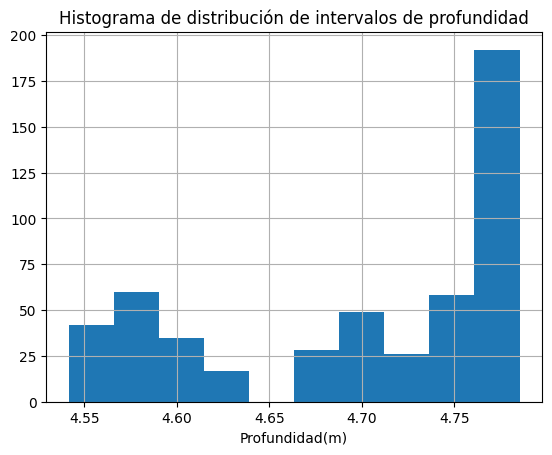

In [127]:
df_cleaned['DELTA_DEPTH'].hist()
plt.title('Histograma de distribución de intervalos de profundidad')
plt.xlabel('Profundidad(m)')

La profundidad de muestreo varía entre 4.54m y 4.78m, donde el valor que más se repite es de 4.7853 m

# Limpieza de nulos
Se van a limpiar las filas donde hay datos nulos

In [129]:
df_cleaned = df_cleaned.dropna(how='any')


In [130]:
df_cleaned

,DEPTH,ACOUSTIC_INTERVAL_VEL,DELTA_DEPTH
3,128.67132,2107.0824,4.78536
5,133.45668,1933.9560,4.78536
7,138.24204,1833.0672,4.78536
9,143.02740,1778.5080,4.78536
11,147.81276,1723.0344,4.78536
...,...,...,...
1007,2487.03084,4012.0824,4.78536
1009,2491.81620,4429.9632,4.78536
1011,2496.60156,4684.4712,4.78536
1013,2501.38692,4578.7056,4.78536


# Remuestreo de la función de velocidad

In [131]:
Velocidad_original={"Velocidad Original":df_cleaned}

In [132]:
def vel_inter(vel_original,intervalo):
    new_depth = np.arange(0, vel_original['DEPTH'].max(), intervalo)
    new_df = pd.DataFrame({'DEPTH': new_depth})
    new_df['ACOUSTIC_INTERVAL_VEL'] = np.interp(new_df['DEPTH'], vel_original['DEPTH'], vel_original['ACOUSTIC_INTERVAL_VEL'])
    label=f'Velocidad remuestreada a {intervalo} m'
    return {label:new_df}
    

In [162]:

def plot_vel(**vels):
    # Crear una figura con un tamaño específico
    plt.figure(figsize=(4, 8))  # Ajusta el tamaño a 12x8 pulgadas (puedes cambiar estos valores)
    
    for key, vel in vels.items():
        plt.plot(vel['ACOUSTIC_INTERVAL_VEL'], vel['DEPTH'], label=key)
    
    # Ajustar los ejes
    plt.gca().invert_yaxis()  # Invierte el eje Y
    
    # Añadir etiquetas y título
    plt.xlabel('Acoustic Interval Velocity (m/s)')
    plt.ylabel('Depth (m)')
    plt.title('Depth vs Acoustic Interval Velocity')
    
    # Añadir una leyenda para identificar las líneas
    plt.legend()
    
    # Mostrar la gráfica
    plt.show()




In [137]:
Vel_original={'Vel original':df_cleaned}

In [167]:
Intervalos=[10,50]

In [168]:
vel_total={}
for i in Intervalos:
    vel_total.update(vel_inter(df_cleaned,i))

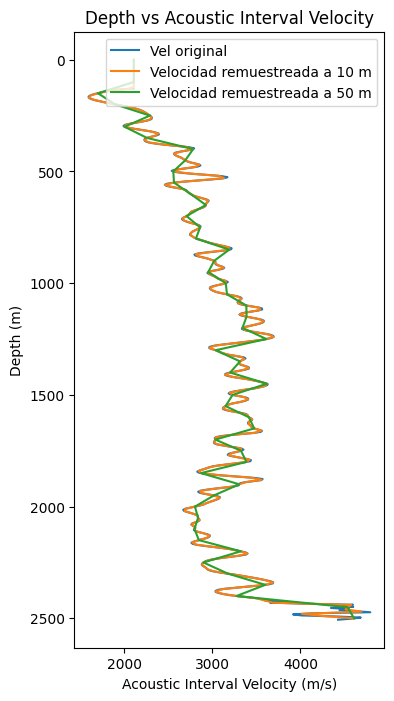

In [169]:
plot_vel(**Vel_original,**vel_total)

# Costrucción de Modelo de Velodad Devito

In [170]:
Vel_10=vel_inter(df_cleaned,10)

In [191]:
vel_columna=list(Vel_10.values())[0]['ACOUSTIC_INTERVAL_VEL']
vel_columna

0      2107.082400
1      2107.082400
2      2107.082400
3      2107.082400
4      2107.082400
          ...     
246    4512.284415
247    4693.826476
248    4015.969312
249    4271.363824
250    4609.359182
Name: ACOUSTIC_INTERVAL_VEL, Length: 251, dtype: float64

In [197]:
v = np.tile(vel_columna.values.reshape(-1, 1), 251).T
v

array([[2107.0824    , 2107.0824    , 2107.0824    , ..., 4015.9693121 ,
        4271.3638242 , 4609.35918217],
       [2107.0824    , 2107.0824    , 2107.0824    , ..., 4015.9693121 ,
        4271.3638242 , 4609.35918217],
       [2107.0824    , 2107.0824    , 2107.0824    , ..., 4015.9693121 ,
        4271.3638242 , 4609.35918217],
       ...,
       [2107.0824    , 2107.0824    , 2107.0824    , ..., 4015.9693121 ,
        4271.3638242 , 4609.35918217],
       [2107.0824    , 2107.0824    , 2107.0824    , ..., 4015.9693121 ,
        4271.3638242 , 4609.35918217],
       [2107.0824    , 2107.0824    , 2107.0824    , ..., 4015.9693121 ,
        4271.3638242 , 4609.35918217]])

In [198]:
v.shape

(251, 251)

In [199]:
#NBVAL_IGNORE_OUTPUT
# Adding ignore due to (probably an np notebook magic) bug
import numpy as np
%matplotlib inline

In [200]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import Model, plot_velocity

# Define a physical size
shape = (251, 251)  # Number of grid point (nx, nz)
spacing = (10., 10.)  # Grid spacing in m. The domain size is now 1km by 1km
origin = (0., 0.)  # What is the location of the top left corner. This is necessary to define
# the absolute location of the source and receivers

Operator `initdamp` ran in 0.01 s


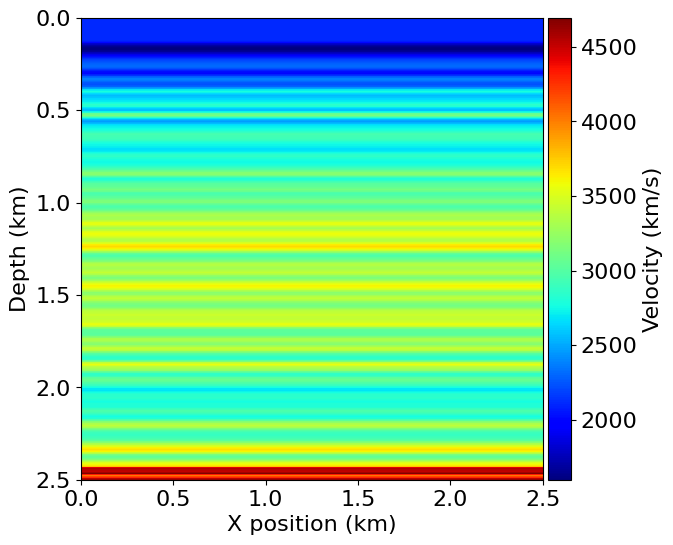

In [203]:
# With the velocity and model size defined, we can create the seismic model that
# encapsulates this properties. We also define the size of the absorbing layer as 10 grid points
model = Model(vp=v, origin=origin, shape=shape, spacing=spacing,
              space_order=2, nbl=10, bcs="damp")

plot_velocity(model)